In [10]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import math

from scipy.stats import norm

In [11]:
### PROBLEM 2.1


g = lambda x: 0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x +1
x = np.linspace(-10,10,500)
gy = g(x)
norm.cdf(gy) 


def function_NumInt1(g, a, b, N, method = {'midpoint', 'trapezoid', 'Simpsons'}):
    if method == "midpoint":
        cdf_num = 0
        for i in range(0,N):
            xi = a + (((2*i+1)*(b-a)))/(2*N)
            cdf_num = cdf_num + g(xi)
        cdf_num = ((b-a) / N) * cdf_num 
        
    if method == "trapezoid":
        x0 = a
        xn = a + N*(b-a)/N
        cdf_num = g(x0) + g(xn)
        for i in range(1,N):
            xi = a + i*(b-a)/N
            cdf_num = cdf_num + 2*g(xi)
        cdf_num = ((b-a) / (2*N)) * cdf_num 

    if method == "Simpsons":
        x0 = a
        x2N = a + 2*N*(b-a)/(2*2*N)
        cdf_num = g(x0) + g(x2N)
        for i in range(0,2*N):
            xi = a + i*(b-a)/(2*N)
            if (i % 2) == 0:
                cdf_num = cdf_num + 2*g(xi)
            else:
                cdf_num = cdf_num + 4*g(xi)
        cdf_num = ((b-a) / (6*N)) * cdf_num    
    
    return(cdf_num)


In [12]:
function_NumInt1(g, np.min(x), np.max(x), 10,
                 'midpoint')

function_NumInt1(g, np.min(x), np.max(x), 10,
                 'trapezoid')

function_NumInt1(g, np.min(x), np.max(x), 10,
                 'Simpsons')

6205.266666666665

[-4.         -3.72413793 -3.44827586 -3.17241379 -2.89655172 -2.62068966
 -2.34482759 -2.06896552 -1.79310345 -1.51724138 -1.24137931 -0.96551724
 -0.68965517 -0.4137931  -0.13793103  0.13793103  0.4137931   0.68965517
  0.96551724  1.24137931  1.51724138  1.79310345  2.06896552  2.34482759
  2.62068966  2.89655172  3.17241379  3.44827586  3.72413793  4.        ]
[-4.         -3.72413793 -3.44827586 -3.17241379 -2.89655172 -2.62068966
 -2.34482759 -2.06896552 -1.79310345 -1.51724138 -1.24137931 -0.96551724
 -0.68965517 -0.4137931  -0.13793103  0.13793103  0.4137931   0.68965517
  0.96551724  1.24137931  1.51724138  1.79310345  2.06896552  2.34482759
  2.62068966  2.89655172  3.17241379  3.44827586  3.72413793  4.        ]


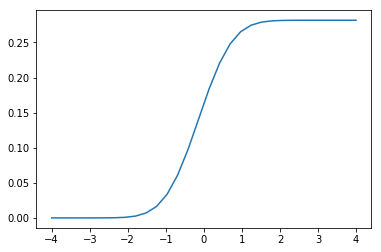

In [13]:
### PROBLEM 2.2

def function_NewtonCotes(mu, sigma, N, k):
    

    # Compute the nodes (where to approximate the function then)
    # Furthest nodes = k standard deviations from mu
    Z = np.linspace(mu - sigma*k, mu +sigma*k, N)
    #Z = np.exp(Z)
    print(Z)
    
    # Define cdf and pdf of normal
    f = lambda x, mu, sigma: sp.stats.norm.pdf(x, mu, sigma)
    F = lambda x, mu, sigma: sp.stats.norm.cdf(x, mu, sigma)
    
    # Compute the weights
    w = []
    for i in range(1,N+1): 
        if i == 1:
            w.append(F((Z[i-1] + Z[i])/2, mu, sigma))
        if i in range(2,N):
            Zmax = (Z[i-1] + Z[i])/2
            Zmin = (Z[i-2] + Z[i-1])/2
            w.append(F(Zmax, mu, sigma) - F(Zmin, mu, sigma))  
        if (i==N):
            w.append(1 - F((Z[i-2] + Z[i-1])/2, mu, sigma))
    

    pdfw = w * f(Z, mu, sigma)
    CDF = np.cumsum(pdfw)
    #CDF = np.cumsum(w)

    return(Z, w, CDF)


plt.plot(function_NewtonCotes(0, 1, 30, 4)[0],
        function_NewtonCotes(0, 1, 30, 4)[2])

f = lambda x, mu, sigma: sp.stats.norm.pdf(x, mu, sigma)
#pdf = f(Z[i-1], mu, sigma)
# Here, we have F and f, but in the general case we might not know the function
  

[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]
[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]
[0.00346697 0.01786442 0.0668072  0.18406013 0.38208858 0.61791142
 0.81593987 0.9331928  0.98213558 0.99653303 1.        ]
[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]
[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]
[0.00346697 0.01786442 0.0668072  0.18406013 0.38208858 0.61791142
 0.81593987 0.9331928  0.98213558 0.99653303 1.        ]


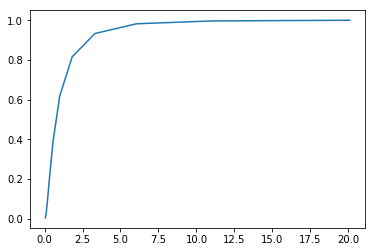

In [14]:
### PROBLEM 2.3
#function_NewtonCotes(0, 1, 11,3)
def function_NewtonCotesLog(mu, sigma, N, k):
    z = np.exp(function_NewtonCotes(mu, sigma, N, k)[0])
    w = function_NewtonCotes(mu, sigma, N, k)[1]
    cdf = np.cumsum(w)
    print(cdf)
    return(z,w,cdf)

plt.plot(function_NewtonCotesLog(0, 1, 11, 3)[0],
        function_NewtonCotesLog(0, 1, 11, 3)[2])



[ 8.1   8.58  9.06  9.54 10.02 10.5  10.98 11.46 11.94 12.42 12.9 ]
[ 8.1   8.58  9.06  9.54 10.02 10.5  10.98 11.46 11.94 12.42 12.9 ]
[0.00346697 0.01786442 0.0668072  0.18406013 0.38208858 0.61791142
 0.81593987 0.9331928  0.98213558 0.99653303 1.        ]
[ 8.1   8.58  9.06  9.54 10.02 10.5  10.98 11.46 11.94 12.42 12.9 ]
[ 8.1   8.58  9.06  9.54 10.02 10.5  10.98 11.46 11.94 12.42 12.9 ]
[0.00346697 0.01786442 0.0668072  0.18406013 0.38208858 0.61791142
 0.81593987 0.9331928  0.98213558 0.99653303 1.        ]
[ 8.1   8.58  9.06  9.54 10.02 10.5  10.98 11.46 11.94 12.42 12.9 ]
[ 8.1   8.58  9.06  9.54 10.02 10.5  10.98 11.46 11.94 12.42 12.9 ]
[0.00346697 0.01786442 0.0668072  0.18406013 0.38208858 0.61791142
 0.81593987 0.9331928  0.98213558 0.99653303 1.        ]
[ 8.1   8.58  9.06  9.54 10.02 10.5  10.98 11.46 11.94 12.42 12.9 ]
[ 8.1   8.58  9.06  9.54 10.02 10.5  10.98 11.46 11.94 12.42 12.9 ]
[0.00346697 0.01786442 0.0668072  0.18406013 0.38208858 0.61791142
 0.81593987 0.933

array([  3294.46807528,   5324.10552531,   8604.15065402,  13904.94762458,
        22471.42991992,  36315.50267425,  58688.55427462,  94845.07026492,
       153276.69022932, 247706.53553245, 400312.19132988])

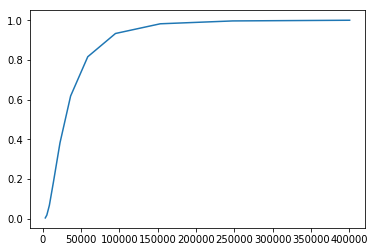

In [15]:
### PROBLEM 2.4

function_NewtonCotesLog(10.5, 0.8, 11, 3)
plt.plot(function_NewtonCotesLog(10.5, 0.8, 11, 3)[0],
        function_NewtonCotesLog(10.5, 0.8, 11, 3)[2])

np.sum(function_NewtonCotesLog(10.5, 0.8, 11, 3)[1] * 
      function_NewtonCotesLog(10.5, 0.8, 11, 3)[0]) 

function_NewtonCotesLog(10.5, 0.8, 11, 3)[0]

In [16]:
### PROBLEM 3.1

g = lambda x: 0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x +1
x = np.linspace(-10,10,500)
gy = g(x)
norm.cdf(gy) 


def function_NumInt1():

    h1 = lambda w1, w2, w3, x1, x2, x3: x - w1 + w2 + w3
    h2 = lambda w1, w2, w3, x1, x2, x3: x1**2/2 + x2**2/2 + x3**2/2 - w1*x1 + w2*x2 + w3*x3
    h3 = lambda w1, w2, w3, x1, x2, x3: x1**3/3 + x2**3/3 + x3**3/3 - w1*x1**2 + w2*x2**2 + w3*x3**2
    h4 = lambda w1, w2, w3, x1, x2, x3: x1**4/4 + x2**4/4 + x3**4/4 - w1*x1**3 + w2*x2**3 + w3*x3**3
    h5 = lambda w1, w2, w3, x1, x2, x3: x1**5/5 + x2**5/5 + x3**5/5 - w1*x1**4 + w2*x2**4 + w3*x3**4
    h6 = lambda w1, w2, w3, x1, x2, x3: x1**6/6 + x2**6/6 + x3**6/6 - w1*x1**5 + w2*x2**5 + w3*x3**5

    h = (h1, h2, h3, h4, h5, h6)
    initial = (0,0,0,0,0,0)

    sp.optimize.root(h, initial)

#function_NumInt1()

In [17]:
### PROBLEM 3.2

from scipy import integrate
# Use the Python gaussian quadrature command
g = lambda x: 0.1*x**4 - 1.5*x**3 + 0.53*x**2 +2*x + 1
value, error = integrate.quad(g, -10, 10)

# Obtain the value analytically
G = lambda x: (0.1/5)*x**5 - (1.5/4)*x**4 + (0.53/3)*x**3 + x**2 + x
true_value = G(10) - G(-10)

Diff = abs(value - true_value)
Diff

0.0

In [18]:
### PROBLEM 4.1
def g(x,y):
    return(((x**2) + y**2 <= 1)*1)

omega = np.array([[-1,1,-1,1]])
xs = np.array([0, 0, 1, 1])
ys = np.array([0, 1, 1, 0])
X = [xs, ys]

import math
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

def approx_pi(omega, n, g):
    
    x = np.random.uniform(omega[0,0], omega[0,1], n)
    y = np.random.uniform(omega[0,0], omega[0,1], n)
    g_approx = lambda x, y, n: (4/n) * np.sum((g(x,y)))
    result_approx = g_approx(x, y, n)
    result_approx = truncate(result_approx, 4)
    #print(n, result_approx)
    error = result_approx - 3.1415
    print(n, result_approx, error)
    if error == 0.0 :
        return("Success", n, result_approx, error)
    if abs(error) > 0.0:
        print("Try a larger N...")


In [19]:
approx_pi(omega, 10000000, g)

10000000 3.1419 0.00039999999999995595
Try a larger N...
